<a href="https://colab.research.google.com/github/paulc00/ML-Intro/blob/master/notebooks/5_Ensemble_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Methods

Ensemble methods are supervised learning methods that combine multiple component models (sometimes referred to as weak learners) to provide significantly stronger machine learning predictions. Ensemble methods can be applied to both regression and classification problems.

In some cases the results of the components of the ensemble are averaged, in others there may be voting, possibly weighted by confidence, across the components. In still other cases, the results of one component feed into the inputs in the next in an iterative, sequential fashion.

Bagging, random forest and boosting, which we'll see below use component learners of all the same type. Another type of ensemble, stacking, aggregates the results of component models which may be of different types (trees, logistic regression, SVM, etc).

In [0]:
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

import matplotlib.pyplot as plt
import numpy as np

In [0]:
plt.rcParams["figure.figsize"] = (10, 8)

results = {}

In [0]:
# Create data set
X, y = make_moons(n_samples=10000, noise=.5, random_state=0)

# Split the training test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
def show_results(X_train, X_test, y_train, y_test, name):
  print(f"{name} accuracy (training) = {accuracy_score(y_train, clf.predict(X_train)) * 100:.2f}%\n")

  y_pred = clf.predict(X_test)

  score = accuracy_score(y_test, y_pred) * 100
  print(f"{name} accuracy (test) = {score:.2f}%\n")

  plt.scatter(X_test[:, 0], X_test[:, 1], s=10, c=y_pred, cmap=cm)
  plt.title(f'{name} (test)')
  results[name] = score

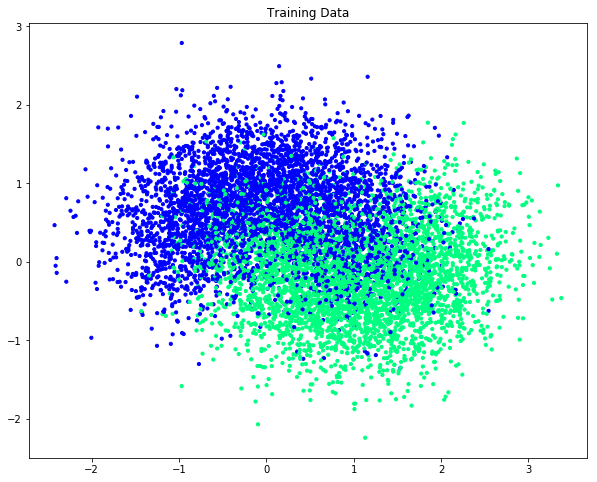

In [5]:
cm = 'winter'
plt.scatter(X_train[:, 0], X_train[:, 1], s=10, c=y_train, cmap=cm)
plt.title('Training Data')
plt.show()

Decision tree accuracy (training) = 100.00%

Decision tree accuracy (test) = 75.80%



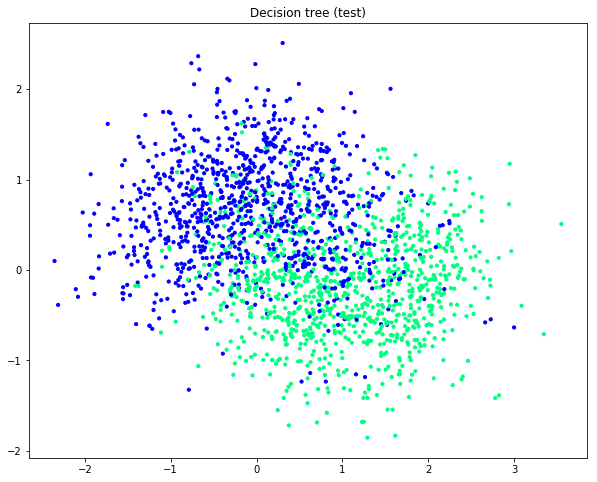

In [6]:
# Fit a Decision Tree model as comparison
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

show_results(X_train, X_test, y_train, y_test, "Decision tree")

## Bagging

Bagging, or bootstrap aggregation, uses a collection of models and classifies based on an equal-weight vote across these models. The training inputs for the component models are select as random samples from the full training set.


![Bagging Process](http://drive.google.com/uc?export=view&id=1q24BSxR-GClVzcaAf6VZI5Wjgg6V59Bq)

Bagging accuracy (training) = 100.00%

Bagging accuracy (test) = 78.70%



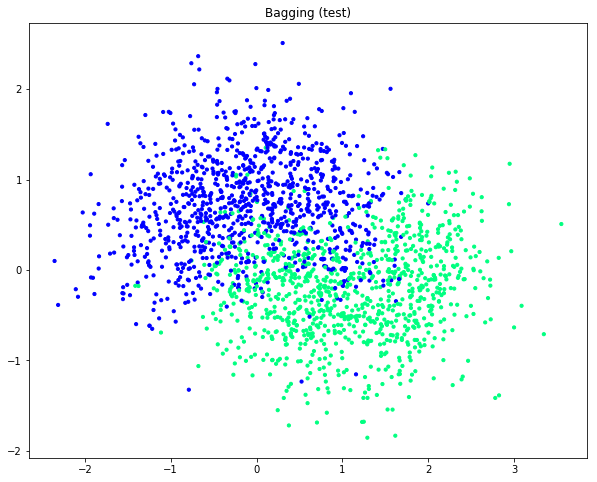

In [7]:
# Fit a Bagging model, " compared to "Decision Tree model, accuracy go up by ?%
clf = BaggingClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

show_results(X_train, X_test, y_train, y_test, "Bagging")

## Random Forest

Random forest is very similar to bagging in that it samples random subsets of the observations but it selects a random subset of features, rather than using all features, for each of its component learners.

![Random Forest Process](http://drive.google.com/uc?export=view&id=1eMBidrlV6Rfwt9VSFPA5vb1zeYnz5KFW)

Random forest accuracy (training) = 99.99%

Random forest accuracy (test) = 79.60%



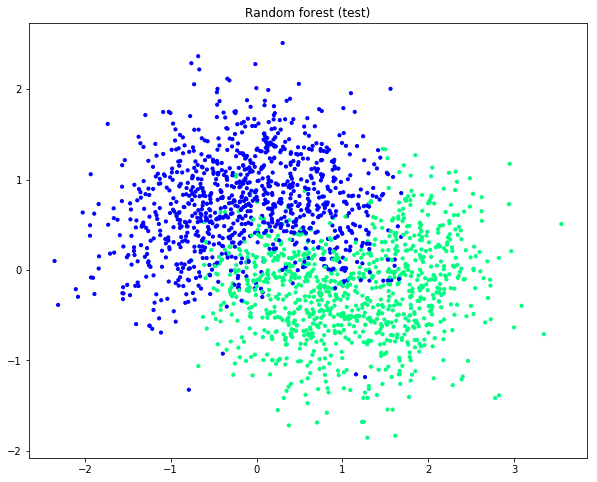

In [8]:
# Step 4: Fit a Random Forest model, " compared to "Decision Tree model, accuracy go up by 5%
clf = RandomForestClassifier(n_estimators=75, max_features="auto", random_state=0)
clf.fit(X_train, y_train)

show_results(X_train, X_test, y_train, y_test, "Random forest")

## Boosting

Gradient boosting differs significantly from bagging and random forest. Where the earlier algorithms run parallel, boosting operates it's component learners sequentially.

After the initial model is trained, the predictions are compared to the target. The difference between the two, for each record are referred to as the residuals. In the next iteration we create a model using the same training data as we originally used but with the residuals as our target.

Adding the second trained model to the first trained model will result in a more accurate prediction.

The difference between the first residuals and the second models predictions, which we'll call the second residuals can then be used as a target in a third model. We can add the third trained model to our other two to provide even more accurate predictions.

This process can be repeated for further levels of residuals until the error has been reduced as much as possible.

XGBoost, which does high-performance gradient boosting, is a very popular and effective tool in Kaggle competitions.

![Random Forest Process](http://drive.google.com/uc?export=view&id=1WOtsIyeWG28_kTbTyKEXVWL1Rfm1e4a2)


Gradient boosting accuracy (training) = 82.93%

Gradient boosting accuracy (test) = 83.40%



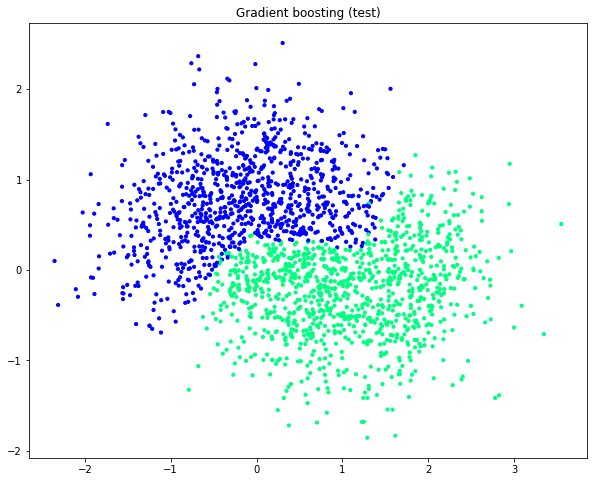

In [9]:
clf = GradientBoostingClassifier(n_estimators=75)
clf.fit(X_train, y_train)

show_results(X_train, X_test, y_train, y_test, "Gradient boosting")

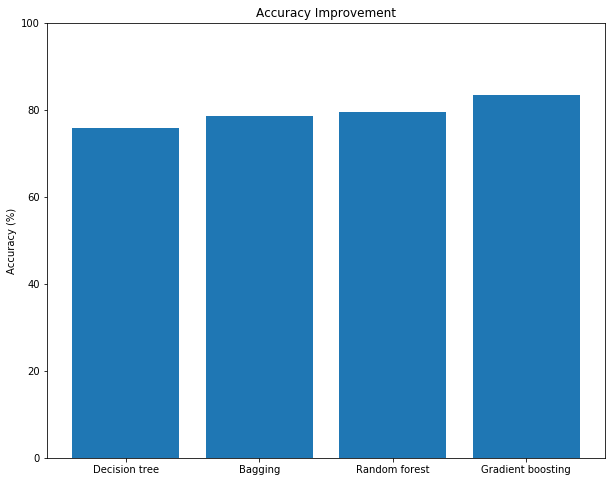

In [11]:
plt.bar(*zip(*results.items()))
plt.title('Accuracy Improvement')
plt.ylabel('Accuracy (%)')
plt.ylim([0, 100])
plt.show()